<a href="https://colab.research.google.com/github/preferencial/googleform-preferential-voting/blob/main/io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Execu

<ipython-input-21-3d9f50c02b05>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Candidata', y='Total', data=resultado, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

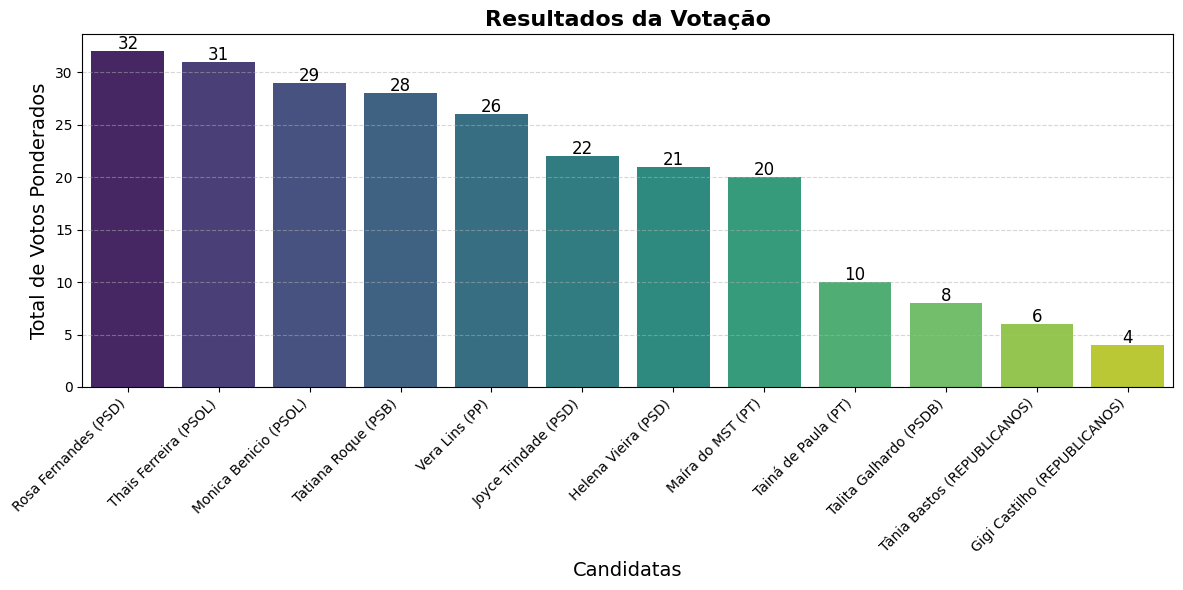

In [ ]:
import pandas as pd
import gspread
from google.auth import default
from google.colab import auth
import seaborn as sns
import matplotlib.pyplot as plt

# Autenticação
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Abrir planilha (substitua pela sua URL)
planilha = gc.open_by_url('https://docs.google.com/spreadsheets/d/1q0-CREREQtkAUfGa6xh2V4Etb-ulcMdBaD-jfPakkKs/edit')
aba = planilha.sheet1
df = pd.DataFrame(aba.get_all_records())

# Lista de candidatas válidas
candidatas_validas = [
    'Tainá de Paula (PT)', 'Rosa Fernandes (PSD)', 'Joyce Trindade (PSD)', 'Helena Vieira (PSD)',
    'Vera Lins (PP)', 'Monica Benicio (PSOL)', 'Tânia Bastos (REPUBLICANOS)', 'Talita Galhardo (PSDB)',
    'Thais Ferreira (PSOL)', 'Tatiana Roque (PSB)', 'Maíra do MST (PT)', 'Gigi Castilho (REPUBLICANOS)'
]

# Pré-processamento
colunas_candidatos = df.columns[1:-1]
df[colunas_candidatos] = df[colunas_candidatos].fillna('0000').astype(str)

# Filtrando os votos apenas para candidatas válidas
def filtrar_votos(df_votos, candidatas_validas):
    for coluna in colunas_candidatos:
        df_votos[coluna] = df_votos[coluna].apply(lambda x: x if x in candidatas_validas else '0000')
    return df_votos

df = filtrar_votos(df, candidatas_validas)

# Função de apuração (sem alterações)
def apuracao_votacao_preferencial(df_votos):
    # Supondo que o código correto da apuração de voto preferencial esteja aqui
    pass

# Função para calcular totais (com candidatas filtradas)
def calcular_totais(voting_df):
    resultados = {candidata: 0 for candidata in candidatas_validas}
    pesos = list(range(len(colunas_candidatos), 0, -1))

    for _, row in voting_df.iterrows():
        for i, coluna in enumerate(colunas_candidatos):
            candidata = row[coluna]
            if candidata in resultados:
                resultados[candidata] += pesos[i]

    return pd.DataFrame(list(resultados.items()), columns=['Candidata', 'Total'])

# Apuração e cálculo dos totais
vencedor = apuracao_votacao_preferencial(df.copy())
resultado = calcular_totais(df)

# Visualização (com tratamento para DataFrame vazio)
def visualizar_resultados(resultado):
    if resultado.empty:
        print("Nenhum resultado para exibir.")
        return

    resultado = resultado.sort_values('Total', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Candidata', y='Total', data=resultado, palette='viridis')

    # Adicionar valores acima das barras
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.0f}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                           textcoords='offset points')

    plt.title('Resultados da Votação', fontsize=16, fontweight='bold')
    plt.xlabel('Candidatas', fontsize=14)
    plt.ylabel('Total de Votos Ponderados', fontsize=14)

    # Ajustar os rótulos do eixo x para evitar sobreposição (opcional)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Adicionar um toque "jovial" com um grid suave
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    plt.show()

# Exibir os resultados com a visualização aprimorada
visualizar_resultados(resultado)